# Regression using Bike Sharing dataset

### Part 1 - Data Loading and Environment Preparation

In [1]:
!conda env list

# conda environments:
#
azureml_4b824bcb98517d791c41923f24d65461     C:\Users\pooja\.azureml\envs\azureml_4b824bcb98517d791c41923f24d65461
azureml_da3e97fcb51801118b8e80207f3e01ad     C:\Users\pooja\.azureml\envs\azureml_da3e97fcb51801118b8e80207f3e01ad
base                     C:\Users\pooja\Anaconda3
env2                  *  C:\Users\pooja\Anaconda3\envs\env2
practice_DS              C:\Users\pooja\Anaconda3\envs\practice_DS



In [2]:
!pip freeze

absl-py==1.3.0
anyio==3.5.0
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
astor==0.8.1
atomicwrites==1.4.0
attrs==22.1.0
Automat==20.2.0
Babel==2.11.0
backcall==0.2.0
bcrypt==3.2.0
beautifulsoup4==4.11.1
bleach==4.1.0
brotlipy==0.7.0
bz2file==0.98
certifi==2022.12.7
cffi==1.15.1
charset-normalizer==2.0.4
colorama==0.4.6
constantly==15.1.0
cryptography==39.0.1
cycler==0.11.0
Cython==0.29.33
debugpy==1.5.1
decorator==5.1.1
defusedxml==0.7.1
entrypoints==0.4
fastjsonschema==2.16.2
flit-core==3.6.0
gast==0.5.3
grpcio==1.42.0
h5py==2.9.0
hyperlink==21.0.0
idna==3.4
importlib-metadata==4.11.3
importlib-resources==5.2.0
incremental==22.10.0
ipykernel==6.15.2
ipython==7.31.1
ipython-genutils==0.2.0
ipywidgets==7.6.5
jedi==0.18.1
Jinja2==3.1.2
joblib==1.1.1
json5==0.9.6
jsonschema==4.17.3
jupyter==1.0.0
jupyter-client==7.4.9
jupyter-console==6.4.4
jupyter-core==4.11.2
jupyter-server==1.23.4
jupyterlab==3.5.3
jupyterlab-pygments==0.1.2
jupyterlab-server==2.19.0
jupyterlab-widge

In [3]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import GridSearchCV


In [4]:
main_data = pd.read_csv("Bike-Sharing-Dataset/day.csv")
main_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
main_data.shape

(731, 16)

In [6]:
main_data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [7]:
## checking data type of each column
main_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
## changing date to datetime 
main_data['date1'] = pd.to_datetime(main_data['dteday'])
main_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date1
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011-01-01
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011-01-02
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011-01-03
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011-01-04
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011-01-05


In [9]:
## checking unique values in each column,
main_data.apply(lambda x :x.nunique())
# 2 year data for 4 seasons as mentioned in readme

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
date1         731
dtype: int64

## Part 2 - Data Processing and Analysis

In [10]:
## marking appropriate data types
col_list = ['yr','weathersit','workingday','weekday','holiday','mnth','season']
main_data[col_list] = main_data[col_list].apply(lambda x:x.astype('object'))
main_data.dtypes

instant                int64
dteday                object
season                object
yr                    object
mnth                  object
holiday               object
weekday               object
workingday            object
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
date1         datetime64[ns]
dtype: object

In [11]:
main_data.isnull().sum() ## no null value

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
date1         0
dtype: int64

In [12]:
main_data.describe()
## cnt can be as low as 22 and max 8714 

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


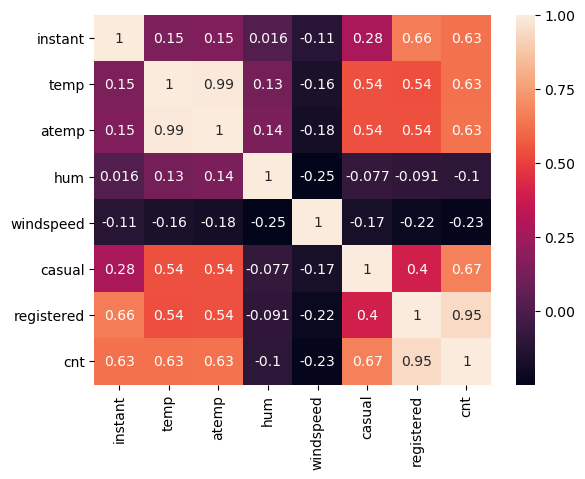

In [14]:
sns.heatmap(main_data.corr(),annot=True)
## since cnt is sum of registered and casual showing high correlation, will exclude casual and registered from model building process
## temp has 0.6 correlation with cnt
## temp also correlated with atemp - so only one variable will be used out of them , although tree based algo are not impacted by multicollinearity

*  there is an increase in number of users both casual and registered from year 1 to year 2
* for casual 51% 
*  for registered 68%
* for year 1 casual users -july was the peak , while for year 2 users were high throughout may to sept

In [18]:
## perc increase in casual riders from year 1 to 2
cal_casual = main_data.groupby(['yr'])['casual'].sum().reset_index()
(cal_casual['casual'][1]-cal_casual['casual'][0])/cal_casual['casual'][0]

0.5076318897319334

In [20]:
## perc increase in registered riders from year 1 to 2
cal_registered = main_data.groupby(['yr'])['registered'].sum().reset_index()
(cal_registered['registered'][1]-cal_registered['registered'][0])/cal_registered['registered'][0]

0.6837970740602761

In [26]:
def cal_year_month_cnt_graph(data,col):
    merged_calc = data.groupby(['yr','mnth'])[col].sum().reset_index()
    merged_calc['year_mon'] = merged_calc['yr'].astype(str)+"_"+merged_calc['mnth'].astype(str)
    merged_calc.drop(['yr','mnth'],axis=1,inplace=True)

    plt.figure(figsize=(10, 5))
    plt.bar(merged_calc['year_mon'],merged_calc[col])
    

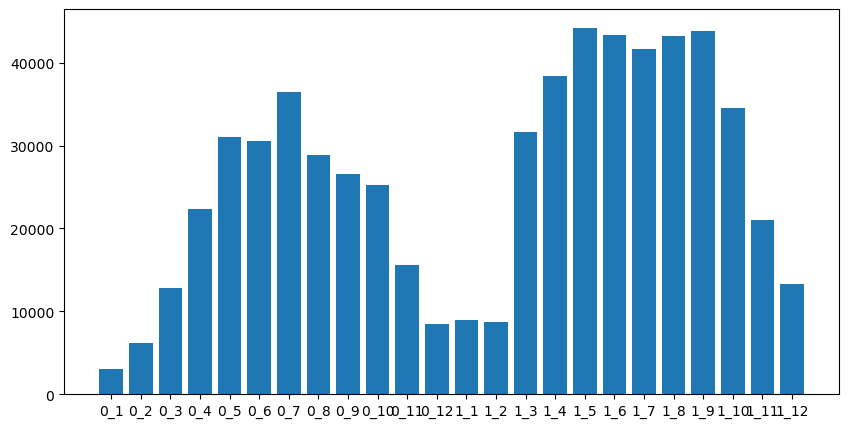

In [27]:
cal_year_month_cnt_graph(main_data,'casual')

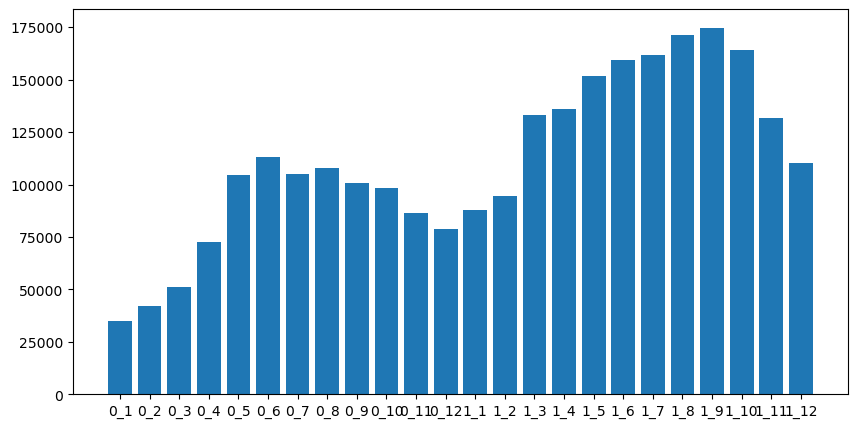

In [28]:
cal_year_month_cnt_graph(main_data,'registered')

In [29]:
def draw_pie_graph(df, grp_col,agg_col):
    temp_df= df.groupby(grp_col)[agg_col].sum().reset_index()
    temp_df[agg_col] = (temp_df[agg_col]/temp_df[agg_col].sum())*100
    plt.pie(temp_df[agg_col],labels = temp_df[grp_col].astype(str),autopct='%1.1f%%')
    plt.show()
    

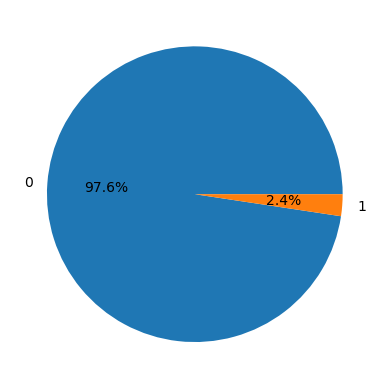

In [30]:
## most usage on non holiday day- this variable not very good as it has 98% enteries with similar value wont be
#helpful in predictor powers.
draw_pie_graph(main_data,'holiday','cnt')

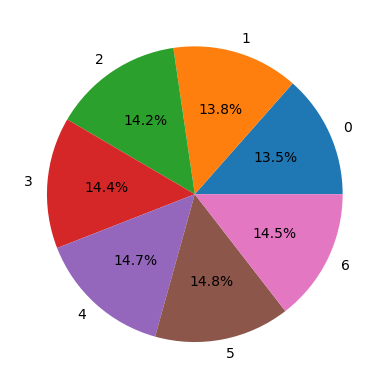

In [31]:
## more or less similar distribution for all weekdays ranging from 13-14% highest on Friday.
draw_pie_graph(main_data,'weekday','cnt')

In [32]:
# Understanding target variable more

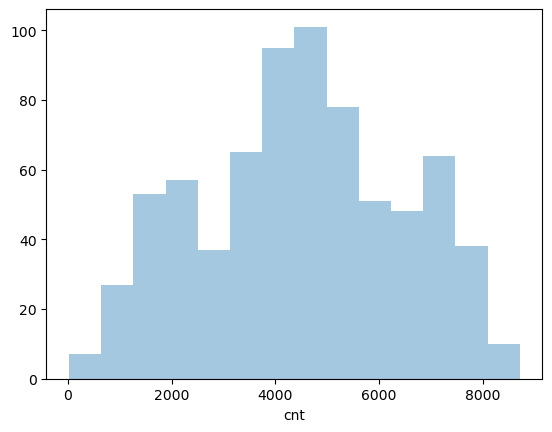

In [34]:
sns.distplot(main_data['cnt'],kde=False) ## close to normal distribution with average around 4.5k

IQR 2804.0
range for finding outlier -1054.0 10162.0


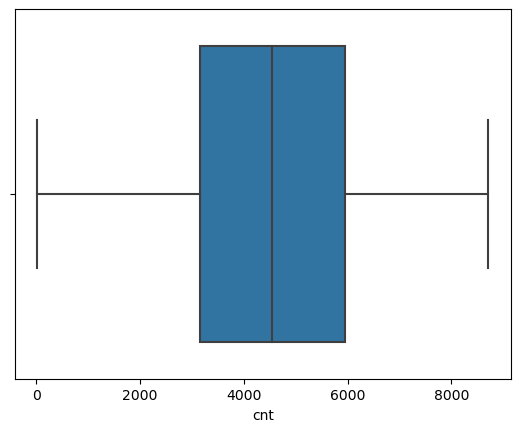

In [35]:
## interquartile range for cnt to check outliers
IQR =main_data['cnt'].quantile(0.75) -  main_data['cnt'].quantile(0.25)
print("IQR",IQR)
print("range for finding outlier",main_data['cnt'].quantile(0.25)-1.5*IQR,main_data['cnt'].quantile(0.75)+1.5*IQR)
sns.boxplot(main_data['cnt']) # no outliers

#### season and cnt
* mean of rentals shift a lot from season 1(springer) to season 2(summer) while highest in season 3(fall).
* this data has maximum users in fall season followed by summer, similar trend in both years

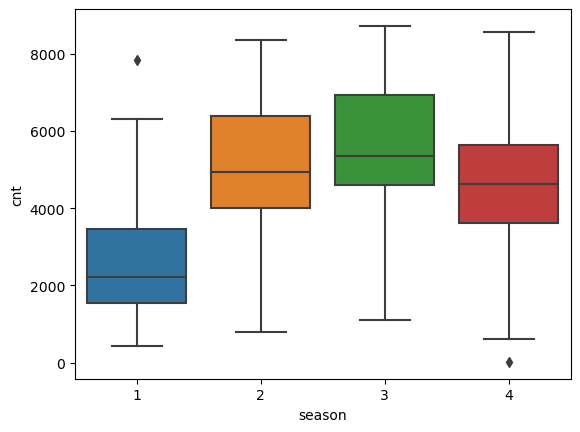

In [37]:
sns.boxplot(main_data['season'], main_data['cnt'])

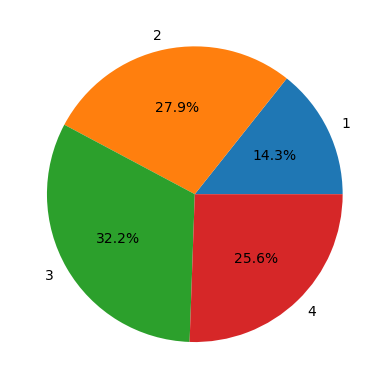

In [39]:
draw_pie_graph(main_data,'season','cnt')

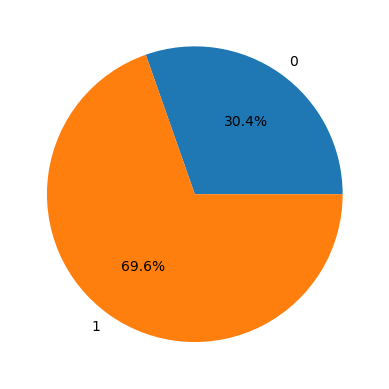

In [43]:
#30.5% on a non workingday, and rest on workingday
draw_pie_graph(main_data,'workingday','cnt')

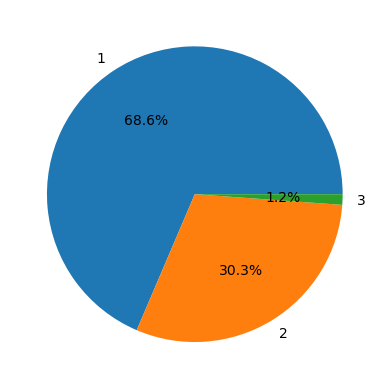

In [44]:
#70% rides during clear sky followed by mist+cloudy
draw_pie_graph(main_data,'weathersit','cnt')

In [49]:
print(main_data[main_data['cnt']>8000].shape) # 12 rec with greater than 8k rentals
main_data[main_data['cnt']>8000] ## mostly sunny weather,and year 1 on a non holiday

(12, 17)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date1
447,448,2012-03-23,2,1,3,0,5,1,2,0.601667,0.570067,0.694167,0.116300,2469,5893,8362,2012-03-23
504,505,2012-05-19,2,1,5,0,6,0,1,0.600000,0.566908,0.456250,0.083975,3410,4884,8294,2012-05-19
518,519,2012-06-02,2,1,6,0,6,0,1,0.583333,0.566288,0.549167,0.186562,2795,5325,8120,2012-06-02
571,572,2012-07-25,3,1,7,0,3,1,1,0.724167,0.654054,0.450000,0.164800,1383,6790,8173,2012-07-25
617,618,2012-09-09,3,1,9,0,0,0,1,0.610000,0.578925,0.547500,0.224496,2570,5657,8227,2012-09-09
622,623,2012-09-14,3,1,9,0,5,1,1,0.633333,0.594083,0.672500,0.103863,1379,6630,8009,2012-09-14
623,624,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714,2012-09-15
629,630,2012-09-21,3,1,9,0,5,1,1,0.599167,0.571971,0.668750,0.154229,1250,6917,8167,2012-09-21
630,631,2012-09-22,3,1,9,0,6,0,1,0.650000,0.610488,0.646667,0.283583,2512,5883,8395,2012-09-22
637,638,2012-09-29,4,1,9,0,6,0,1,0.542500,0.530296,0.542917,0.227604,2589,5966,8555,2012-09-29


### Section 3 - Model building 

In [51]:
main_data.dtypes

instant                int64
dteday                object
season                object
yr                    object
mnth                  object
holiday               object
weekday               object
workingday            object
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
date1         datetime64[ns]
dtype: object

In [52]:
main_data.drop(['date1'],axis=1,inplace=True)

In [53]:
## creating dummy columns
cat_col_dummies = pd.get_dummies(main_data.drop(['dteday'],axis=1))

cat_col_dummies.dtypes


instant           int64
temp            float64
atemp           float64
hum             float64
windspeed       float64
casual            int64
registered        int64
cnt               int64
season_1          uint8
season_2          uint8
season_3          uint8
season_4          uint8
yr_0              uint8
yr_1              uint8
mnth_1            uint8
mnth_2            uint8
mnth_3            uint8
mnth_4            uint8
mnth_5            uint8
mnth_6            uint8
mnth_7            uint8
mnth_8            uint8
mnth_9            uint8
mnth_10           uint8
mnth_11           uint8
mnth_12           uint8
holiday_0         uint8
holiday_1         uint8
weekday_0         uint8
weekday_1         uint8
weekday_2         uint8
weekday_3         uint8
weekday_4         uint8
weekday_5         uint8
weekday_6         uint8
workingday_0      uint8
workingday_1      uint8
weathersit_1      uint8
weathersit_2      uint8
weathersit_3      uint8
dtype: object

In [54]:
y = main_data['cnt']
X = cat_col_dummies.drop(['instant','casual','registered','cnt','atemp'],axis=1)

In [55]:
X.head()

,temp,hum,windspeed,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,0.344167,0.805833,0.160446,1,0,0,0,1,0,1,...,0,0,0,0,1,1,0,0,1,0
1,0.363478,0.696087,0.248539,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
2,0.196364,0.437273,0.248309,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,1,0,0
3,0.200000,0.590435,0.160296,1,0,0,0,1,0,1,...,1,0,0,0,0,0,1,1,0,0
4,0.226957,0.436957,0.186900,1,0,0,0,1,0,1,...,0,1,0,0,0,0,1,1,0,0


In [56]:
## splitting between train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [57]:
X_train.shape

(584, 35)

In [58]:
y_train.shape

(584,)

In [59]:
## this is after some trials , using GridSearchCV with RandomForest regressor and using rmse to measure performance 
params = {'n_estimators': [200,300,400,500],
           'max_depth': [10,15,20,30],
           'max_features' : ['auto','log2']}
    
rfmodel1 = RandomForestRegressor(
#                                  min_samples_split=15,
#                                  min_samples_leaf=8,
#                                  min_impurity_decrease=0.02,
                                 random_state =118)
                                 #oob_score=True)
gsearch1 =GridSearchCV(estimator = rfmodel1, param_grid = params, scoring='neg_mean_squared_error', cv=7)

gsearch1.fit(X_train,y_train)

C:\Users\pooja\Anaconda3\envs\env2\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=118,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [10, 15, 20, 30],
 

In [60]:
best_model = gsearch1.best_estimator_
best_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=118, verbose=0,
                      warm_start=False)

In [61]:
print(sqrt(mean_squared_error(y_train,best_model.predict(X_train))))
print(sqrt(mean_squared_error(y_test,best_model.predict(X_test))))

## 714 error means the prediction will be off by 714 , this can further be improved, however for a naive modle prediction i.e average 4.5k , this number is better.

254.73708720647218
714.0697354297837


In [63]:
def draw_res(y_train,X_train):
    pred_act = pd.DataFrame({'Actual': y_train.values,'Predicted':best_model.predict(X_train)})
    pred_act['residual'] = pred_act['Actual'] - pred_act['Predicted']
    pred_act['residual'].hist()

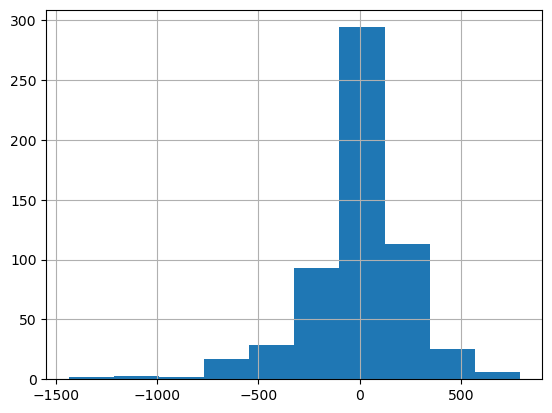

In [64]:
draw_res(y_train,X_train)

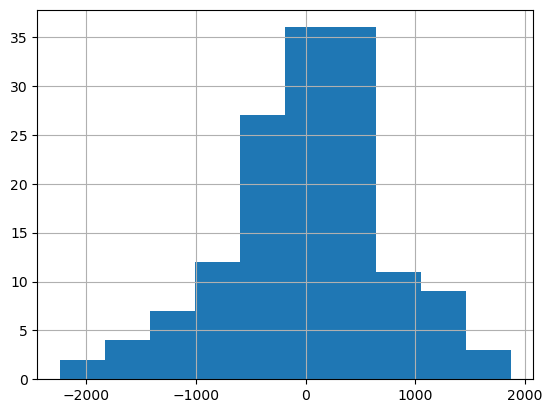

In [65]:
draw_res(y_test,X_test) ## looks pretty much following normal distribution

<BarContainer object of 35 artists>

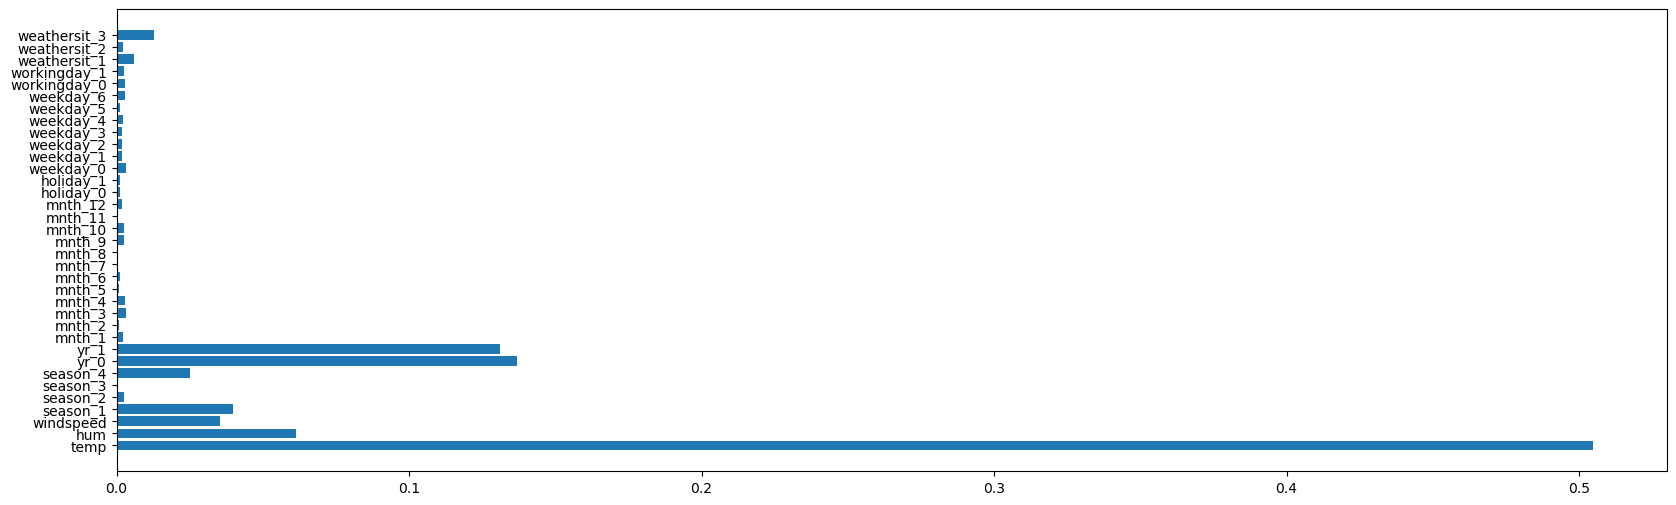

In [66]:
feat_imp = pd.DataFrame( {'col':list(X_train.columns),'feature_imp':best_model.feature_importances_})

plt.figure(figsize=(20, 6))
plt.barh(feat_imp['col'],feat_imp['feature_imp'])
## temp, year, hum,windspeed, season1  comes to be good predictors

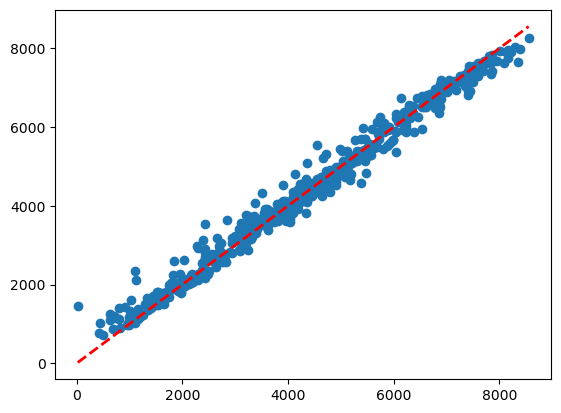

In [67]:
plt.scatter(y_train.values,best_model.predict(X_train))
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--', lw=2) 

In [68]:
best_model.score(X_test,y_test) ## r2 value - 85%

0.8505758936084372